<a href="https://colab.research.google.com/github/MonirulIslamm08/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
This Credit Card Fraud Detection project aims to accurately identify fraudulent transactions within a highly imbalanced dataset, where only a small fraction of transactions are fraudulent. The dataset, available on Kaggle, contains over 284,000 credit card transactions with anonymized features, allowing for in-depth analysis without privacy concerns.

The project involves several critical steps to preprocess, analyze, and model the data to detect fraud effectively. Key phases include data cleaning, feature scaling, and addressing class imbalance through techniques like SMOTE and class-weight adjustments. A range of models will be tested, from logistic regression and decision trees to more advanced algorithms like random forests, gradient boosting, and autoencoders. Performance will be evaluated through metrics like precision, recall, F1-score with a focus on minimizing false positives while maximizing fraud detection accuracy.

Steps taken to analyze the data and to build the model:

Download the dataset from Kaggle’s Credit Card Fraud Detection dataset. This dataset contains anonymized credit card transactions labeled as fraudulent or legitimate. Inspect the Dataset: It has 284,807 transactions, with only 492 labeled as fraud (about 0.17%), making it highly imbalanced. Run the following code in jupyter noteboor  or google colab any other tool:

![99d53d31-a8a4-4cd0-83bb-e891c2ebee94.png](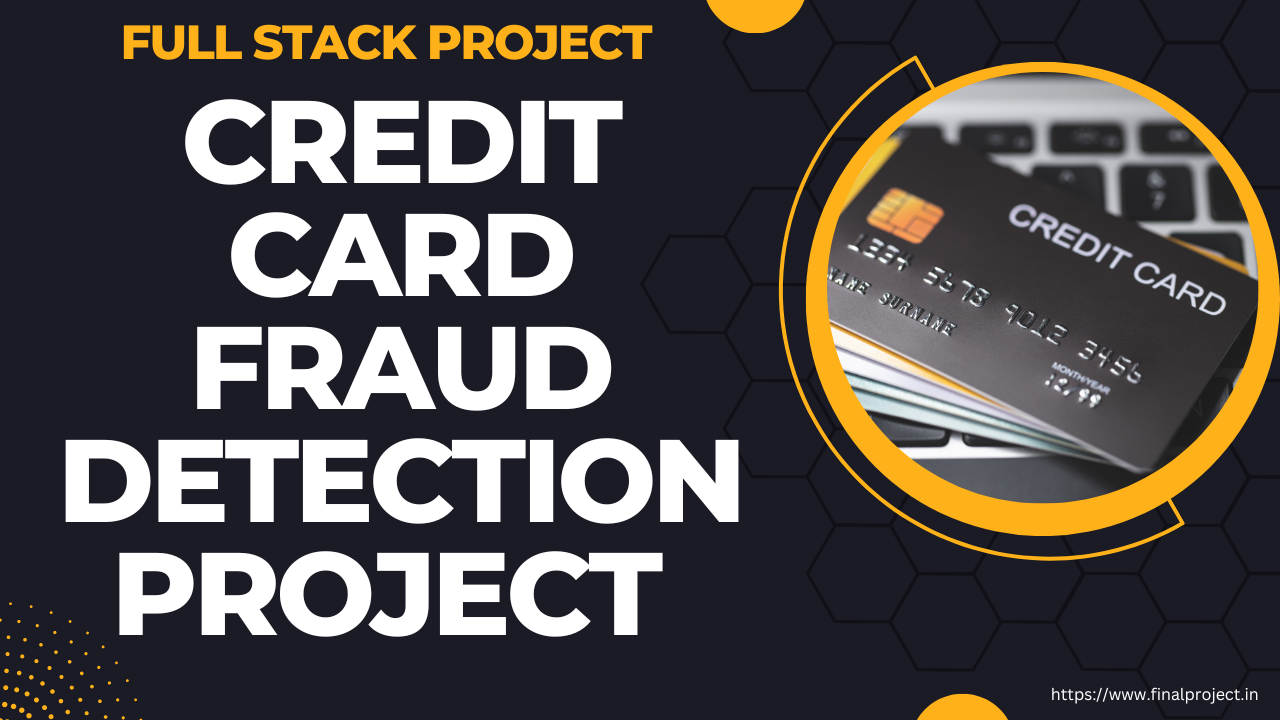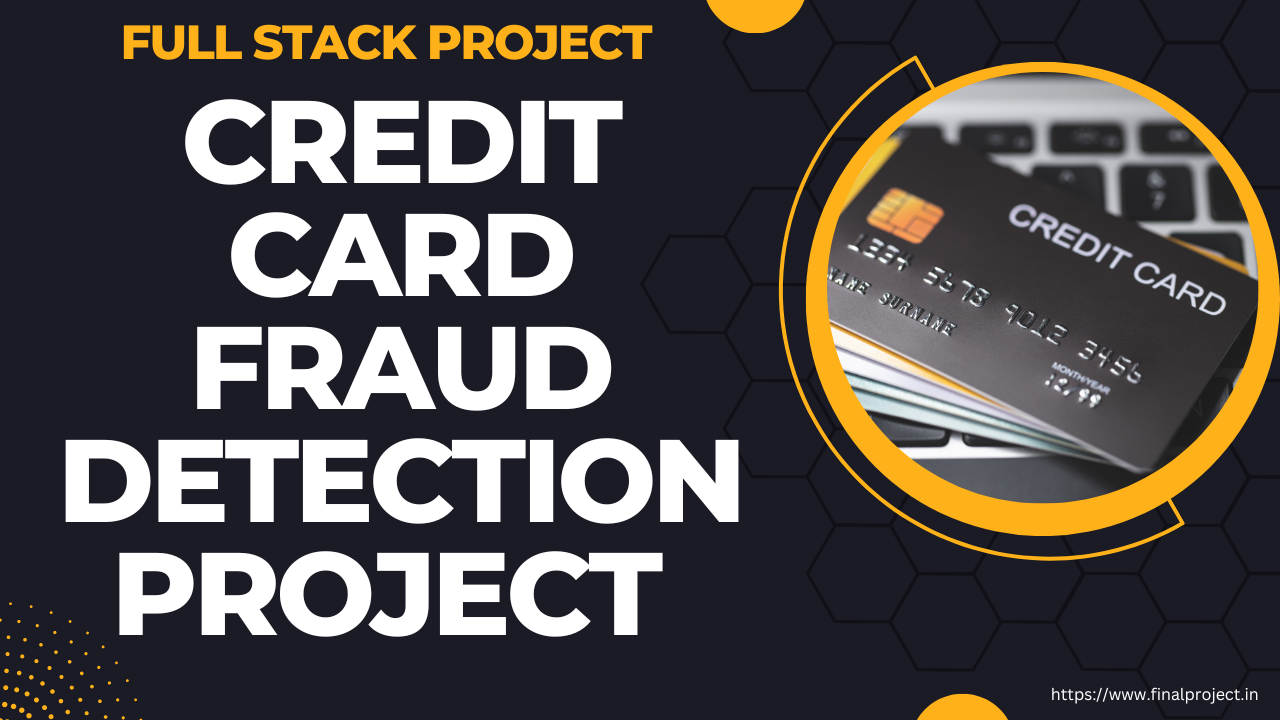)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.shape

(284807, 31)

In [6]:
print('No Frauds', round(data['Class'].value_counts()[0]))
print('Frauds', round(data['Class'].value_counts()[1]))

No Frauds 284315
Frauds 492


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Class', ylabel='count'>

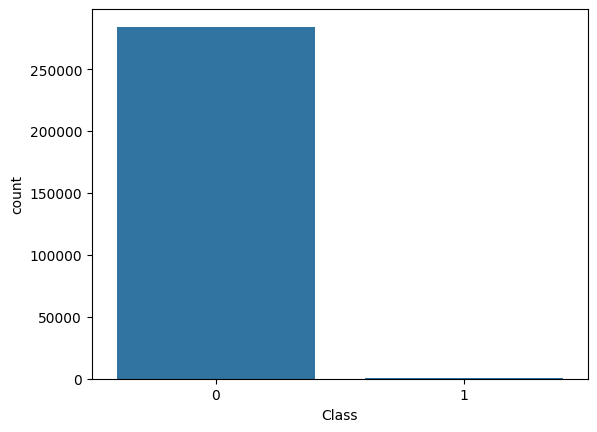

In [8]:
sns.countplot(x = 'Class', data=data)


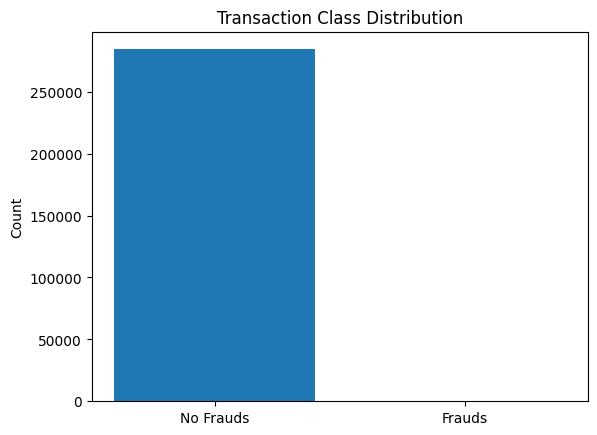

In [9]:
class_counts = data['Class'].value_counts()
labels = ['No Frauds', 'Frauds']
values = [class_counts[0], class_counts[1]]

plt.bar(labels, values)
plt.title('Transaction Class Distribution')
plt.ylabel('Count')
plt.show()

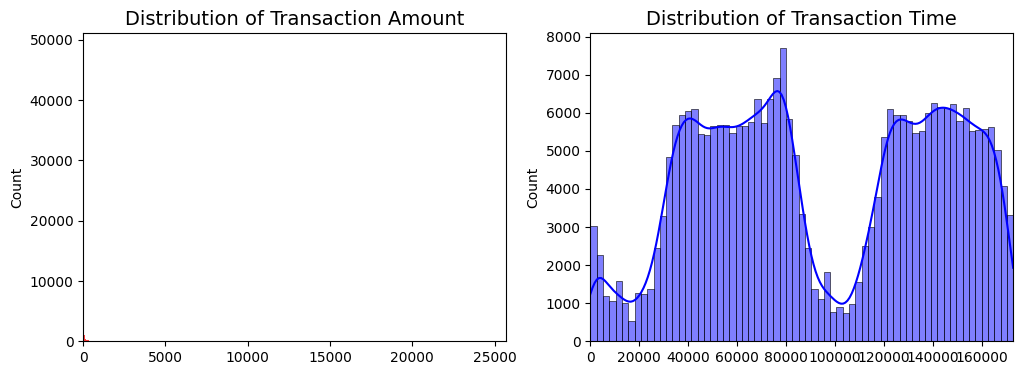

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b',kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

#  Data Preprocessing

In [11]:
#the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [13]:
data = data.drop_duplicates()
data.shape

(283726, 31)

In [14]:
data.isnull().sum()
data.dropna(inplace=True)

In [15]:
data['Class'].value_counts()

,count
Class,
0,283253
1,473


# *Undersampling*
Since our classes are highly skewed I should make them equivalent in order to have a normal distribution of the classes.

 Lets shuffle the data before creating the subsamples

In [16]:
df = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:473]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=42)

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
79874,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,...,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1,-0.236289,-0.311035
88897,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,-4.834828,...,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1,-0.292042,-0.262585
201495,1.917232,-0.042368,-1.829937,0.616928,0.039161,-1.538879,0.328262,-0.376686,0.683237,-0.526846,...,0.633117,-0.075640,-0.041642,0.202381,-0.109259,-0.019151,-0.017793,0,0.739887,0.578155
274382,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,2.688670,...,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,1,-0.307413,0.955004
17366,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,-7.939642,...,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,1,1.089779,-0.658302


Class
1    0.5
0    0.5
Name: count, dtype: float64


<Axes: xlabel='Class', ylabel='count'>

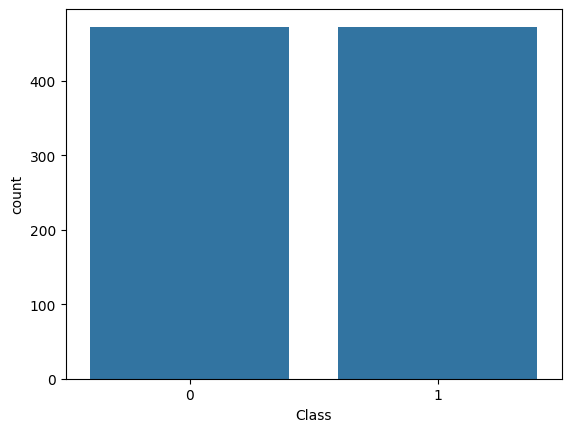

In [17]:
print(df['Class'].value_counts()/len(df))
sns.countplot(x = 'Class', data=df)

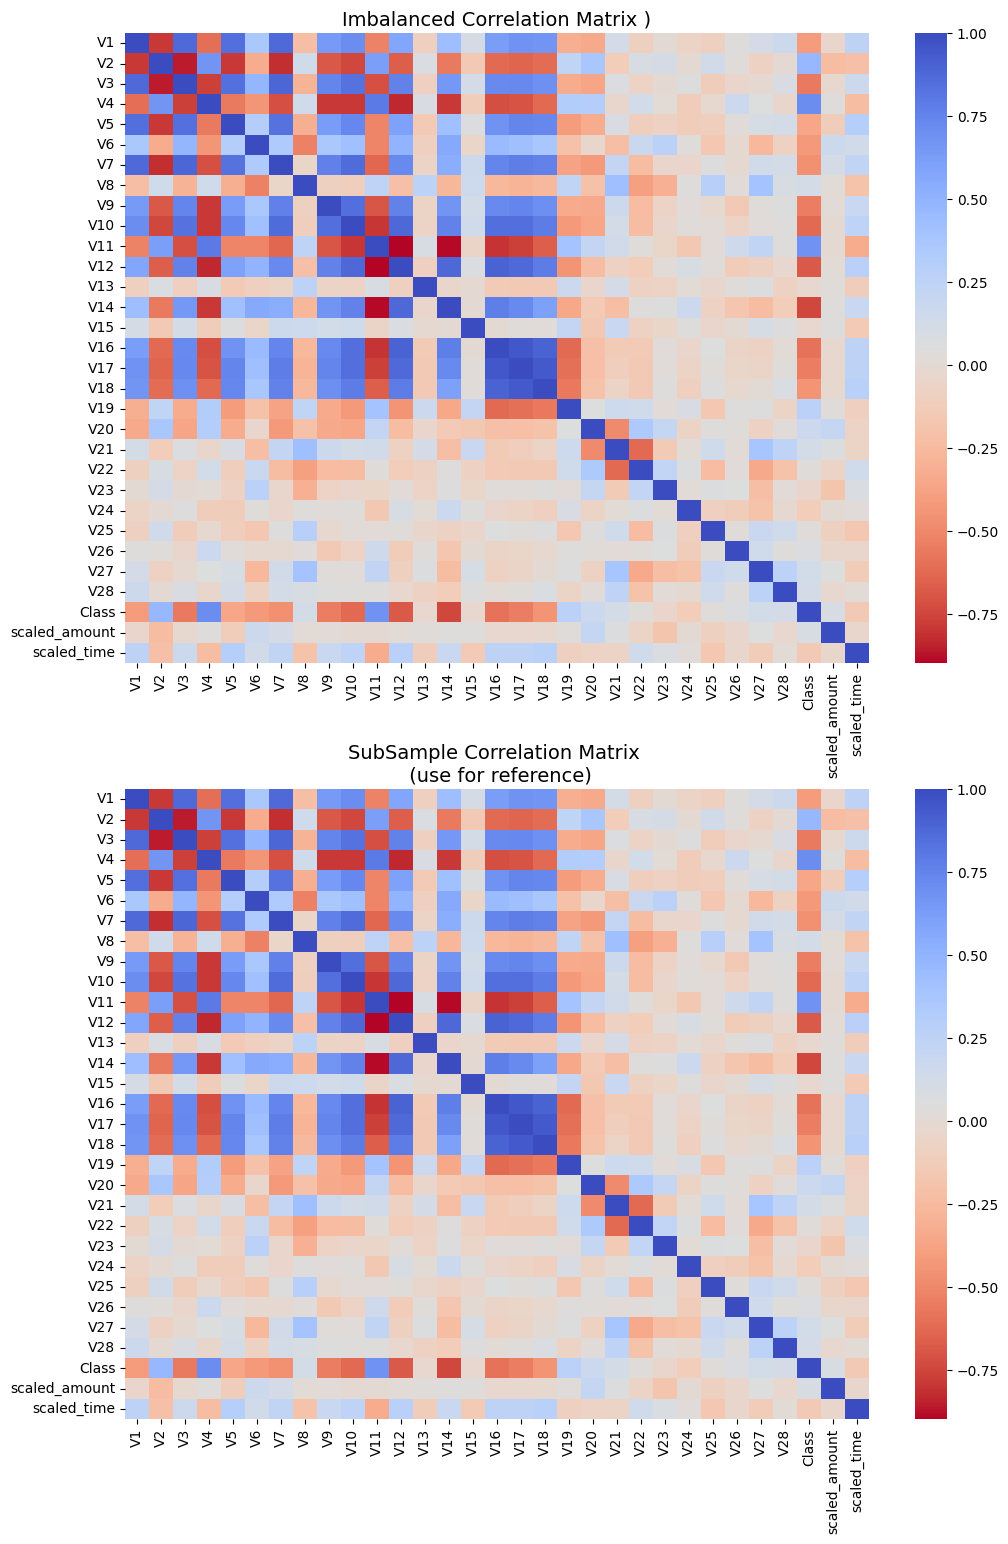

In [18]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix )", fontsize=14)


sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier # Import XGBClassifier directly from xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model:

In [22]:
classfier = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier()
}

for name, clf in classfier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n=========={name}===========")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')
    print(accuracy_score(y_test, y_pred))


==========LogisiticRegression===========
[[99  1]
 [ 9 81]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       100
           1       0.99      0.90      0.94        90

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



0.9473684210526315

==========RandomForestClassifier===========
[[99  1]
 [ 9 81]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       100
           1       0.99      0.90      0.94        90

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



0.9473684210526315

==========DecisionTreeClassifier===========
[[90 10]
 [ 6 84]]


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       100


# OVERSAMPLING
Synthetic Minority Over-sampling Technique (SMOTE):
SMOTE generates synthetic samples for the minority class by interpolating between existing samples and their nearest neighbors.
This increases the presence of the minority class in the training dataset without duplicating existing samples.
It’s particularly effective as it reduces the chances of overfitting that can occur with simple random oversampling.



In [23]:
X = data.drop('Class', axis=1)
y = data['Class']

In [24]:
X.shape

(283726, 30)

In [25]:
y.shape

(283726,)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X_resambole,y_resambole = SMOTE().fit_resample(X,y)

In [28]:
y_resambole.value_counts()

,count
Class,
0,283253
1,283253


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X_resambole, y_resambole, test_size=0.2, random_state=42)

# Evaluate the model:

In [30]:

classfier = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier()
}

for name, clf in classfier.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n=========={name}===========")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')
    print(accuracy_score(y_test, y_pred))


==========LogisiticRegression===========
[[55044  1419]
 [ 4557 52282]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.95     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



0.947256006072267

==========RandomForestClassifier===========
[[56453    10]
 [    0 56839]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



0.9999117403046724

==========DecisionTreeClassifier===========
[[56294   169]
 [   71 56768]]


              precision    recall  f1-score   support

           0       

In [31]:
DTC = DecisionTreeClassifier()
DTC.fit(X_resambole, y_resambole)

DecisionTreeClassifier()

 # Deployment

Save the model: You can save the trained model using joblib for later use.

In [32]:
import joblib

In [33]:
joblib.dump(DTC, 'Credit_card_model.pkl')

['Credit_card_model.pkl']

In [34]:
model = joblib.load('Credit_card_model.pkl')

In [35]:
data_point = [[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]]

In [36]:
pred = model.predict(data_point)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
pred[0]

0

In [38]:
if pred[0] == 0:
  print('No Fraud')
else:
  print('Fraud')

No Fraud
